<a href="https://colab.research.google.com/github/grownsandip/ML_Algo/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this note book we shall learn the preprocessing of data and visualization techniques using pandas library**

In [ ]:
import sklearn

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
df=fetch_openml('titanic',version=1,as_frame=True)['data']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


getting information about the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(6)
memory usage: 115.4+ KB


**Now we are checking whether there are nay null values in the data set**

In [ ]:
df.isnull()

now we are seeing total number of null values in each column

In [ ]:
df.isnull().sum()

we are going the plot graph of these missing values using seabord library to visualize how impactfull they are

In [ ]:
import seaborn as sns

In [ ]:
sns.set()
miss_val_per=pd.DataFrame((df.isnull().sum()/len(df))*100)
miss_val_per.plot(kind='bar',title='Missing value percentages',ylabel='percentage')

so we have seen the body attribute column is having the most number of missing values which is not good so we drop this column

In [ ]:
print(f'shape of data set:{df.shape}')

shape of data set:(1309, 13)


In [ ]:
df.drop(['body'],axis=1,inplace=True)
print(f'shape of data set:{df.shape}')

shape of data set:(1309, 12)


instead of removing column we can perform data imputation which basically means that missing data will be filled with mean or median values lets see how this goes

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
print(f'No of missing values before imputing:{df.age.isnull().sum()}')

No of missing values before imputing:263


In [ ]:
im=SimpleImputer(strategy='mean') #creating an simple imputer and applying mean strategy
df['age']=im.fit_transform(df[['age']]) #transforming our age columm according to our strategy
print(f'No of missing values in age after imputing:{df.age.isnull().sum()}')

No of missing values in age after imputing:0


lets create a seperate strategy function as mean and median can be done only for int data types lets do something for the other data types also

In [ ]:
def get_parameters(df):
  parameters={}
  for col in df.columns[df.isnull().any()]:
     if df[col].dtype=='int64' or df[col].dtype=='float64' or df[col].dtype=='int32':
       strategy='mean'
     else:
       strategy='most_frequent'
     missing_values=df[col][df[col].isnull()].values[0]
     parameters[col]={'missing_values':missing_values,strategy:'strategy'}
  return parameters

get_parameters(df)

{'fare': {'missing_values': nan, 'mean': 'strategy'},
 'cabin': {'missing_values': None, 'most_frequent': 'strategy'},
 'embarked': {'missing_values': nan, 'most_frequent': 'strategy'},
 'boat': {'missing_values': None, 'most_frequent': 'strategy'},
 'home.dest': {'missing_values': None, 'most_frequent': 'strategy'}}

In [ ]:
parameters=get_parameters(df)

now we are going to impute the parameters

In [ ]:
for col,param in parameters.items():
  missing_values=param['missing_values']
  strategy=param['strategy']
  imp2=SimpleImputer(missing_values=missing_values,strategy=strategy)
  df[col]=imp2.fit_transform(df[[col]])

In [ ]:
print(parameters)

In [ ]:
df.head()

lets now club the items on baisis of sibsp and parch to find if person travelled alone or not

<Axes: title={'center': 'passenger travelled alone?'}, xlabel='travelled_alone'>

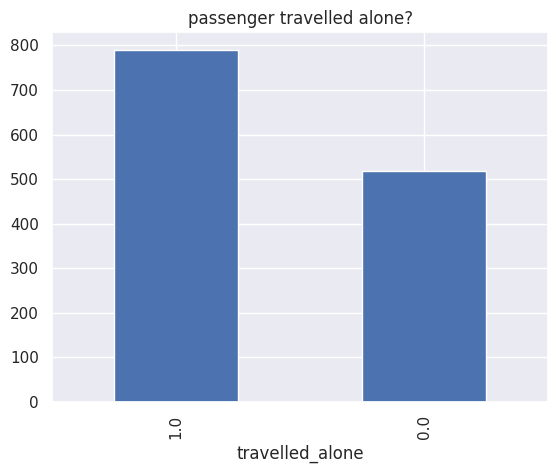

In [ ]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family']==0,'travelled_alone']=1
df['travelled_alone'].value_counts().plot(title='passenger travelled alone?',kind='bar')
